# 0. Imports

In [231]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)
import numpy as np
import statistics

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

from collections import Counter

# 1. Data Prep / Cleaning

In [232]:
df = pd.read_json('../data/cleaned/filtered_data.json')
df.head(5)

,job_title,company_name,job_type,industry,date_posted,url,source,lower_salary,upper_salary,lower_year,upper_year,all_tech_stack,education_level,education_field,cleaned_job_desc,aws,google_cloud,azure,cluster
0,Senior Python Developer,citi,permanent,Banking/Accounting/Financial Services,2022-02-18,https://www.monster.com.sg/seeker/job-details?...,monster,NaN,NaN,NaN,NaN,"[RabbitMQ, Tableau Dashboards, Bitbucket, SOAP...",[],[],job description job purpose we are look...,1,1,0,Software Developer
1,Senior Partner Solutions Architect (Microsoft),amazon,permanent,Internet/E-commerce,2022-02-18,https://www.monster.com.sg/seeker/job-details?...,monster,NaN,NaN,NaN,NaN,"[Queue, Containers, Azure, RFPs, Microsoft ELA...",[Master's],[],job description job summary description d...,1,1,1,Solutions Architect
7,Cloud Engineer (Automation),recruit expert pte. ltd.,permanent,Employment agency,2022-02-19,https://www.monster.com.sg/seeker/job-details?...,monster,48000.0,66000.0,2,5,"[Cloud, OpenStack, Ansible, Cloud robotics, Op...","[Master's, Bachelor's]","[Relevant Field, Information Technology, Compu...",in charge of the design deployment installat...,0,0,0,Cloud Engineer
8,Cloud Engineer (Automation),recruit expert pte. ltd.,permanent,Employment agency,2022-03-14,https://www.monster.com.sg/seeker/job-details?...,monster,48000.0,60000.0,2,5,"[Cloud, OpenStack, Ansible, Cloud robotics, Op...","[Master's, Bachelor's]","[Relevant Field, Information Technology, Compu...",in charge of the design deployment installat...,0,0,0,Cloud Engineer
9,Senior Software and Automation Architect,cisco international limited singapore branch,permanent,Employment agency,2022-02-19,https://www.monster.com.sg/seeker/job-details?...,monster,108000.0,180000.0,10,15,"[Information Security, Modeling, Bitbucket, Ba...",[],[],what you ll do cisco customer experience cx ...,1,0,0,Solutions Architect


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5405 entries, 0 to 11446
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   job_title         5405 non-null   object 
 1   company_name      5405 non-null   object 
 2   job_type          5402 non-null   object 
 3   industry          5405 non-null   object 
 4   date_posted       5046 non-null   object 
 5   url               5405 non-null   object 
 6   source            5405 non-null   object 
 7   lower_salary      2874 non-null   float64
 8   upper_salary      2874 non-null   float64
 9   lower_year        5405 non-null   object 
 10  upper_year        5405 non-null   object 
 11  all_tech_stack    5405 non-null   object 
 12  education_level   5405 non-null   object 
 13  education_field   5405 non-null   object 
 14  cleaned_job_desc  5405 non-null   object 
 15  aws               5405 non-null   int64  
 16  google_cloud      5405 non-null   int64  

In [234]:
x = df["upper_salary"][1]
print(type(x))
print(x)

<class 'numpy.float64'>
nan


### Cleaning years of experience and salary to integers

In [235]:
df["lower_year"] = df["lower_year"].apply(lambda x: np.NaN if x == "NaN" or x == "" else x)
df["lower_year"] = df["lower_year"].apply(lambda x: int(x) if type(x) == str else x)

df["upper_year"] = df["upper_year"].apply(lambda x: np.NaN if x == "NaN" or x == "" else x)
df["upper_year"] = df["upper_year"].apply(lambda x: int(x) if type(x) == str else x)

df["upper_salary"] = df["upper_salary"].fillna(0)
df["upper_salary"] = df["upper_salary"].astype(np.int64)

df["lower_salary"] = df["lower_salary"].fillna(0)
df["lower_salary"] = df["lower_salary"].astype(np.int64)

# 2. Raw Stats

### Unique number of companies

In [236]:
len(df['company_name'].unique())

1388

# 3. Individual Bar Graphs

In [237]:
def plot_individual_bar(x_list, y_list, x_label, y_label, title, rotate=90):
    plt.bar(x_list, y_list)
    plt.xlabel(x_label, fontweight ='bold')
    plt.ylabel(y_label, fontweight ='bold')
    plt.title(title, fontweight ='bold')
    plt.xticks(rotation=rotate)
    plt.tight_layout()
    
    plt.savefig(f'./plots/{title}.png', dpi=1000, bbox_inches = "tight")
    plt.show()

### Count of listings By platform

{'monster': 3544, 'nodeflair': 1501, 'linkedin': 360}


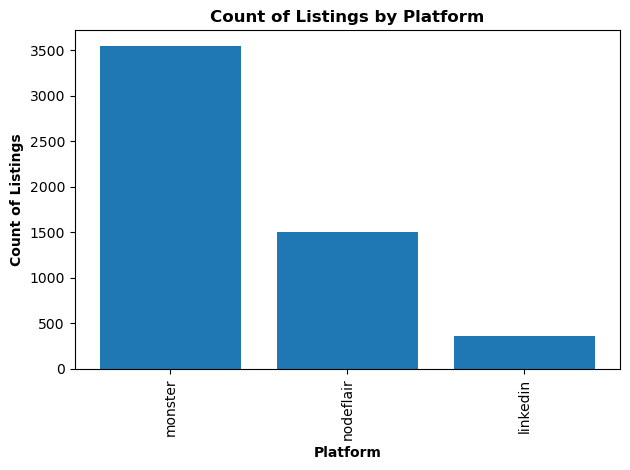

In [238]:
value_dict = df['source'].value_counts().to_dict()
print(value_dict)

plot_individual_bar(
    x_list = value_dict.keys(),
    y_list = value_dict.values(),
    x_label = "Platform",
    y_label = "Count of Listings",
    title = "Count of Listings by Platform"
)

### Count of listings by Job Type

{'permanent': 5344, 'contract': 53, 'intern': 5}


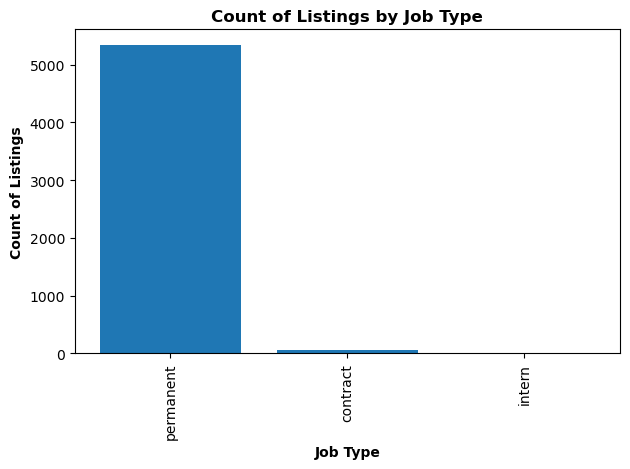

In [239]:
value_dict = df['job_type'].value_counts().to_dict()
print(value_dict)

plot_individual_bar(
    x_list = value_dict.keys(),
    y_list = value_dict.values(),
    x_label = "Job Type",
    y_label = "Count of Listings",
    title = "Count of Listings by Job Type"
)

### Count of listings By tech stack (top 10)

In [240]:
# Getting dictionary of top tech stacks
techstack_list = []

for rows in df.itertuples():
    temp_list = [x.lower() for x in rows.all_tech_stack]
    techstack_list += temp_list

# Sort tech stack by key
value_dict = Counter(techstack_list)
value_dict = {k: v for k, v in sorted(value_dict.items(), key=lambda item: item[1], reverse=True)}
value_dict

{'aws': 2418,
 'java': 1981,
 'python': 1930,
 'computer science': 1726,
 'azure': 1528,
 'javascript': 1519,
 'sql': 1430,
 'devops': 1407,
 'kubernetes': 1306,
 'on': 1293,
 'singapore': 1234,
 'ci': 1219,
 'docker': 1165,
 'linux': 1157,
 'api': 957,
 'agile': 879,
 'git': 850,
 'jenkins': 789,
 'age': 762,
 'kafka': 693,
 'software development': 685,
 'information technology': 683,
 'ansible': 661,
 'gcp': 645,
 'cloud': 632,
 'mysql': 624,
 'national origin': 570,
 'react': 564,
 'nosql': 557,
 'go': 529,
 'terraform': 529,
 'religion': 528,
 'oracle': 516,
 'security': 514,
 'windows': 508,
 'color': 489,
 'unix': 485,
 'infrastructure': 464,
 'angular': 462,
 'vmware': 456,
 'rest': 455,
 'gender': 455,
 'spring': 450,
 'strategy': 436,
 'networking': 435,
 'software engineering': 434,
 'big data': 421,
 'analytics': 412,
 'continuous integration': 402,
 'c++': 401,
 'amazon': 397,
 'microsoft': 390,
 'shell': 390,
 'engineering': 390,
 'css': 387,
 'spark': 384,
 'develop': 380

In [241]:
# Removing unwanted 'stacks'
stop_list = ["on", "computer science", "singapore", "ci", "devops", "api", "agile", "age", "software development", "information technology"]

for x in stop_list:
    value_dict.pop(x, None)

value_dict

{'aws': 2418,
 'java': 1981,
 'python': 1930,
 'azure': 1528,
 'javascript': 1519,
 'sql': 1430,
 'kubernetes': 1306,
 'docker': 1165,
 'linux': 1157,
 'git': 850,
 'jenkins': 789,
 'kafka': 693,
 'ansible': 661,
 'gcp': 645,
 'cloud': 632,
 'mysql': 624,
 'national origin': 570,
 'react': 564,
 'nosql': 557,
 'go': 529,
 'terraform': 529,
 'religion': 528,
 'oracle': 516,
 'security': 514,
 'windows': 508,
 'color': 489,
 'unix': 485,
 'infrastructure': 464,
 'angular': 462,
 'vmware': 456,
 'rest': 455,
 'gender': 455,
 'spring': 450,
 'strategy': 436,
 'networking': 435,
 'software engineering': 434,
 'big data': 421,
 'analytics': 412,
 'continuous integration': 402,
 'c++': 401,
 'amazon': 397,
 'microsoft': 390,
 'shell': 390,
 'engineering': 390,
 'css': 387,
 'spark': 384,
 'develop': 380,
 'html': 380,
 'cloud computing': 379,
 'troubleshooting': 378,
 'bachelor': 366,
 'mongodb': 343,
 'data': 342,
 'architect': 340,
 'hadoop': 339,
 'c#': 338,
 'disability': 334,
 'nodejs': 

{'aws': 2418, 'java': 1981, 'python': 1930, 'azure': 1528, 'javascript': 1519, 'sql': 1430, 'kubernetes': 1306, 'docker': 1165, 'linux': 1157, 'git': 850}


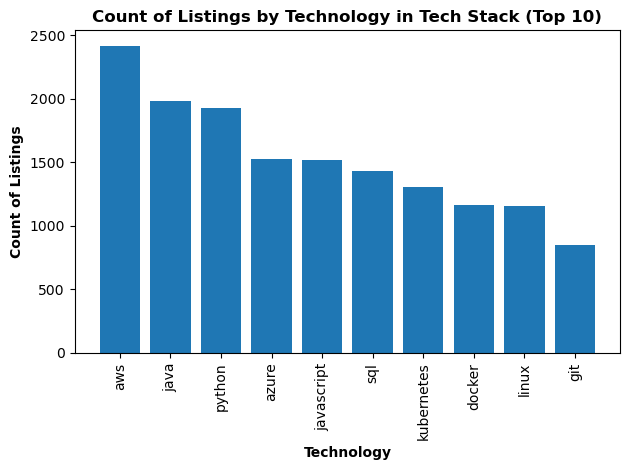

In [242]:
x_list = list(value_dict.keys())[0:10]
y_list = list(value_dict.values())[0:10]
print({x_list[i]: y_list[i] for i in range(len(x_list))})

plot_individual_bar(
    x_list = x_list,
    y_list = y_list,
    x_label = "Technology",
    y_label = "Count of Listings",
    title = "Count of Listings by Technology in Tech Stack (Top 10)"
)

### Count of listings By industry (top 10)

{'IT': 1005, 'Banking/Accounting/Financial Services': 224, 'Internet/E-commerce': 222, 'Corporate': 217, 'Information Technology & Services': 194, 'Recruitment/Staffing/RPO': 189, 'Employment agency': 164, 'Recruiter': 158, 'Telecom': 130, 'Internet': 106}


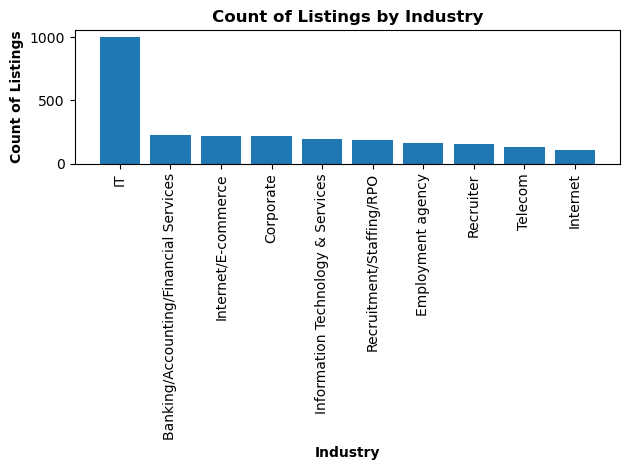

In [243]:
value_dict = df['industry'].value_counts().to_dict()
value_dict.pop('None')
x_list = list(value_dict.keys())[0:10]
y_list = list(value_dict.values())[0:10]
print({x_list[i]: y_list[i] for i in range(len(x_list))})

plot_individual_bar(
    x_list = x_list,
    y_list = y_list,
    x_label = "Industry",
    y_label = "Count of Listings",
    title = "Count of Listings by Industry"
)

### Count of listings by company (top 10)

{'amazon': 181, 'singtel': 173, 'amazon web services (aws)': 106, 'e27 media platform': 99, 'govtech': 97, 'jpmorgan chase & co.': 84, 'luxoft': 68, 'accenture pte ltd': 63, 'the supreme hr advisory pte. ltd.': 51, 'vmware': 51}


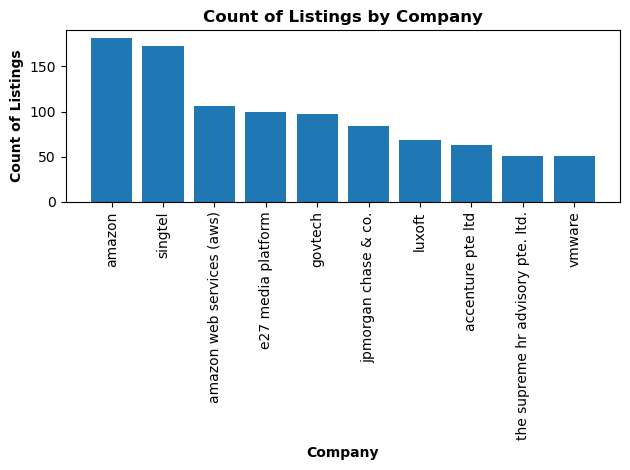

In [244]:
value_dict = df['company_name'].value_counts().to_dict()
x_list = list(value_dict.keys())[0:10]
y_list = list(value_dict.values())[0:10]
print({x_list[i]: y_list[i] for i in range(len(x_list))})

plot_individual_bar(
    x_list = x_list,
    y_list = y_list,
    x_label = "Company",
    y_label = "Count of Listings",
    title = "Count of Listings by Company"
)

### Count of listings by service Provider

In [245]:
provider_list = ["aws", "google_cloud", "azure"]
value_dict = {key: 0 for key in provider_list}

for i in range(len(df)):
    for provider in provider_list:
        if df[provider].iloc[i] == 1:
            value_dict[provider] += 1

value_dict

{'aws': 2790, 'google_cloud': 800, 'azure': 1641}

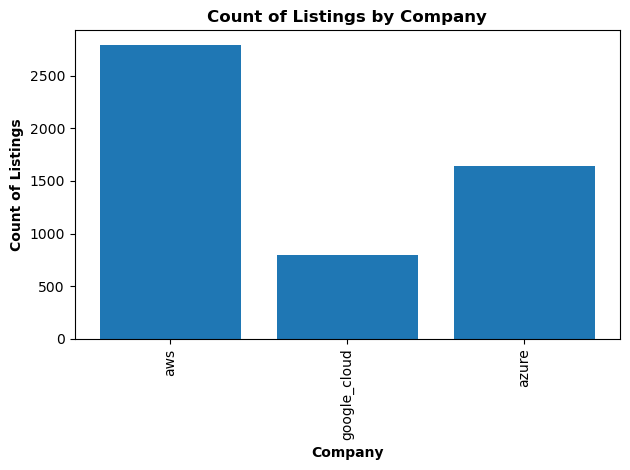

In [246]:
x_list = list(value_dict.keys())
y_list = list(value_dict.values())

plot_individual_bar(
    x_list = x_list,
    y_list = y_list,
    x_label = "Company",
    y_label = "Count of Listings",
    title = "Count of Listings by Company"
)

# 4. Clustered Bar Graphs

### Number of Listings by Platform, Grouped by Month

In [247]:
# Get month
df['month'] = df['date_posted'].apply(lambda x: x[:-3] if type(x) == str else x)

In [248]:
exclude_month = ["2021-12", "2021-11"]
month_df = df[df.month.isin(exclude_month) == False]
month_df.groupby(["source"])['month'].value_counts()

source     month  
linkedin   2022-03     221
           2022-02     120
           2022-01      14
monster    2022-03    2457
           2022-02    1087
nodeflair  2022-02     540
           2022-03     388
           2022-01     214
Name: month, dtype: int64

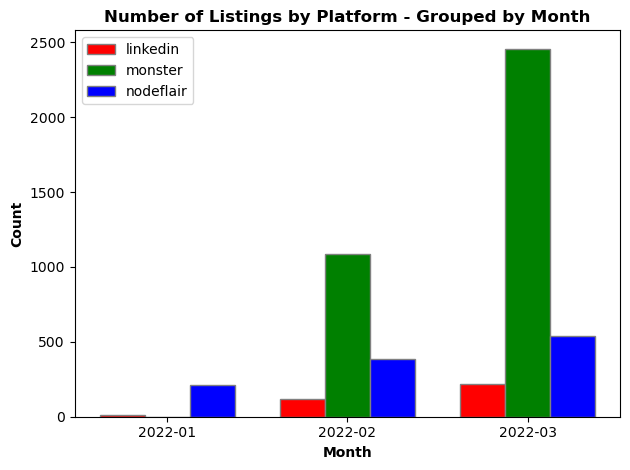

In [249]:
# set width of bar
barWidth = 0.25
# fig = plt.subplots(figsize =(12, 12))
 
# set height of bar
linkedin = [14, 120, 221]
monster = [0, 1087, 2457]
nodeflair = [214, 388, 540]
 
# Set position of bar on X axis
br1 = np.arange(len(linkedin))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, linkedin, color ='r', width = barWidth,
        edgecolor ='grey', label ='linkedin')
plt.bar(br2, monster, color ='g', width = barWidth,
        edgecolor ='grey', label ='monster')
plt.bar(br3, nodeflair, color ='b', width = barWidth,
        edgecolor ='grey', label ='nodeflair')
 
# Adding Xticks
plt.xlabel('Month', fontweight ='bold')
plt.ylabel('Count', fontweight ='bold')
plt.xticks([r + barWidth for r in range(len(linkedin))],
        ['2022-01', '2022-02', '2022-03'])

plt.title("Number of Listings by Platform - Grouped by Month", fontweight ='bold')
plt.legend()
plt.tight_layout()

plt.savefig("./plots/Number of Listings by Platform - Grouped by Month.png", dpi=1000, bbox_inches = "tight")
plt.show()

### Number of listings by Minimum Years of experience required (top 5 Roles)

In [250]:
df["cluster"].value_counts()

Solutions Architect              964
Software Engineer                819
Software Developer               576
Data Engineer                    535
Cloud Engineer                   440
Devops Engineer                  403
Security Engineer                365
Specialist                       350
Full Stack Developer/Engineer    325
Network Engineer                 208
Java Developer                   194
System Engineer                  193
Ios Developer                     33
Name: cluster, dtype: int64

In [251]:
# Get top 5 job roles by count
value_dict = df["cluster"].value_counts().to_dict()
keep_roles = list(value_dict.keys())[:5]
print(keep_roles)

['Solutions Architect', 'Software Engineer', 'Software Developer', 'Data Engineer', 'Cloud Engineer']


#### Solutions Architect

{'0': 8, '1': 1, '2': 59, '3': 16, '4': 10, '5': 170, '6': 16, '7': 108, '8': 38, '10': 148, '12': 1, '14': 2, '15': 8, '17': 1}


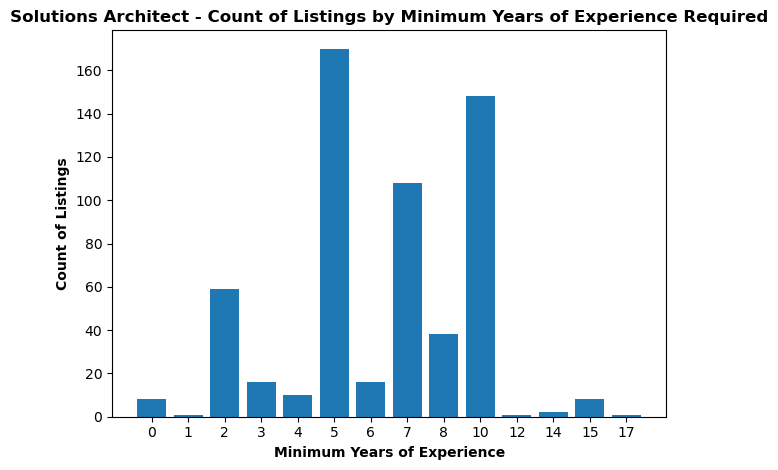

In [252]:
value_dict = df[df["cluster"] == "Solutions Architect"]["lower_year"].value_counts().to_dict()
value_dict = {str(int(key)):value_dict[key] for key in sorted(value_dict.keys())}
print(value_dict)

plot_individual_bar(
    x_list = value_dict.keys(),
    y_list = value_dict.values(),
    x_label = "Minimum Years of Experience",
    y_label = "Count of Listings",
    title = "Solutions Architect - Count of Listings by Minimum Years of Experience Required",
    rotate = 0
)

#### Software Engineer

{'0': 83, '1': 12, '2': 141, '3': 22, '4': 9, '5': 101, '6': 4, '7': 31, '8': 7, '10': 16, '15': 1}


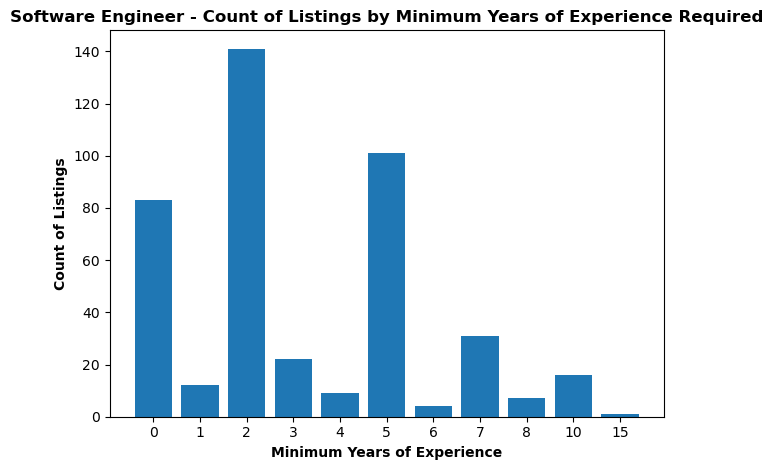

In [253]:
value_dict = df[df["cluster"] == "Software Engineer"]["lower_year"].value_counts().to_dict()
value_dict = {str(int(key)):value_dict[key] for key in sorted(value_dict.keys())}
print(value_dict)

plot_individual_bar(
    x_list = value_dict.keys(),
    y_list = value_dict.values(),
    x_label = "Minimum Years of Experience",
    y_label = "Count of Listings",
    title = "Software Engineer - Count of Listings by Minimum Years of Experience Required",
    rotate = 0
)

#### Software Developer

{'0': 36, '1': 12, '2': 157, '3': 19, '4': 7, '5': 90, '6': 4, '7': 13, '8': 3, '10': 4}


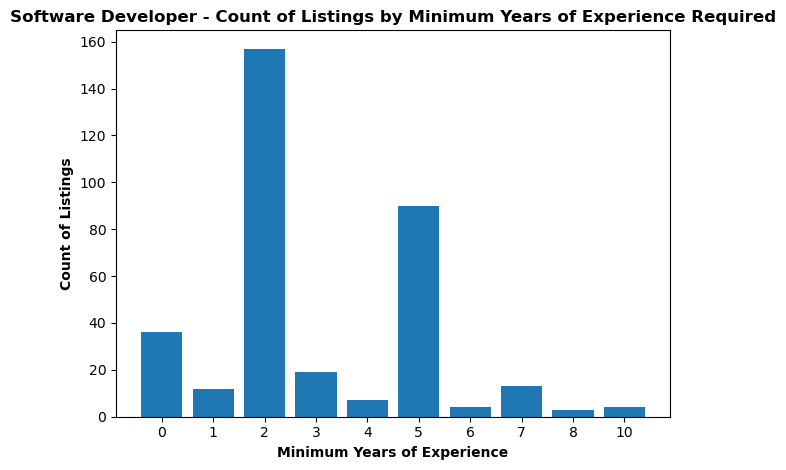

In [254]:
value_dict = df[df["cluster"] == "Software Developer"]["lower_year"].value_counts().to_dict()
value_dict = {str(int(key)):value_dict[key] for key in sorted(value_dict.keys())}
print(value_dict)

plot_individual_bar(
    x_list = value_dict.keys(),
    y_list = value_dict.values(),
    x_label = "Minimum Years of Experience",
    y_label = "Count of Listings",
    title = "Software Developer - Count of Listings by Minimum Years of Experience Required",
    rotate = 0
)

#### Data Engineer

{'0': 13, '1': 4, '2': 83, '3': 22, '4': 5, '5': 69, '7': 20, '8': 1, '10': 26, '11': 1, '12': 3, '15': 3}


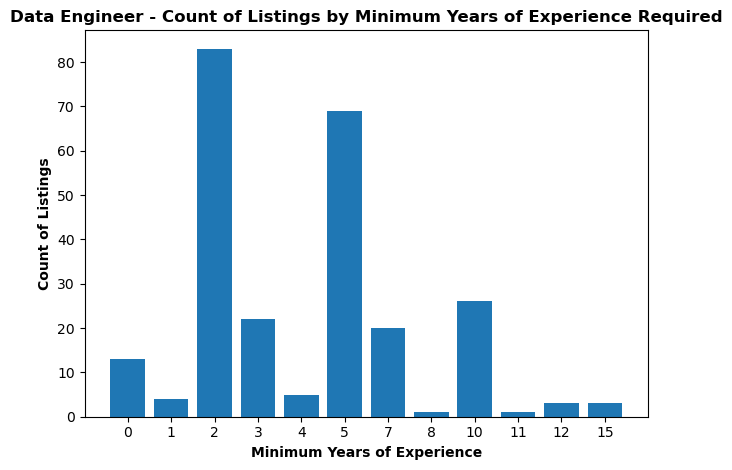

In [255]:
value_dict = df[df["cluster"] == "Data Engineer"]["lower_year"].value_counts().to_dict()
value_dict = {str(int(key)):value_dict[key] for key in sorted(value_dict.keys())}
print(value_dict)

plot_individual_bar(
    x_list = value_dict.keys(),
    y_list = value_dict.values(),
    x_label = "Minimum Years of Experience",
    y_label = "Count of Listings",
    title = "Data Engineer - Count of Listings by Minimum Years of Experience Required",
    rotate = 0
)

#### Cloud Engineer

{'0': 29, '1': 1, '2': 89, '3': 27, '4': 5, '5': 59, '6': 4, '7': 7, '8': 6, '10': 6, '12': 1}


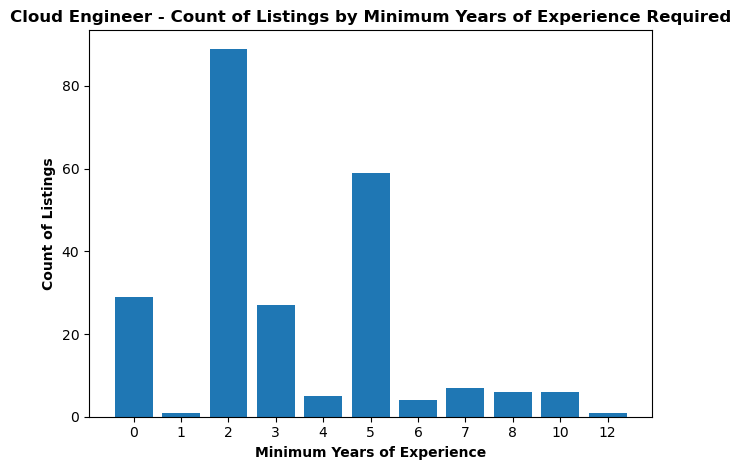

In [256]:
value_dict = df[df["cluster"] == "Cloud Engineer"]["lower_year"].value_counts().to_dict()
value_dict = {str(int(key)):value_dict[key] for key in sorted(value_dict.keys())}
print(value_dict)

plot_individual_bar(
    x_list = value_dict.keys(),
    y_list = value_dict.values(),
    x_label = "Minimum Years of Experience",
    y_label = "Count of Listings",
    title = "Cloud Engineer - Count of Listings by Minimum Years of Experience Required",
    rotate = 0
)

# 5. Salary Box Plots

## Preperation

### Get average salary column

In [295]:
df['average_salary'] = (df['upper_salary'] + df['lower_salary'])/2
df['average_salary'] = df['average_salary'].astype(np.int64)

### View cut-off for yearly salary v.s. monthly salary

Cut-off for yearly onwards is at 17750, can tell because of the job title (principal, head, etc)

to clean: 
- drop lower_salary in [0, 1, 12]
- drop any salary above 1020000

In [258]:
df.sort_values(by=['lower_salary'], ascending=False)[["job_title", "lower_salary", "upper_salary", "average_salary"]]

,job_title,lower_salary,upper_salary,average_salary
5973,Senior Data Engineer,1800000,2160000,1980000
6922,Site Reliability Engineer,1296000,1782000,1539000
793,Solution Architect,1020000,1800000,1410000
7002,Solution Architect,1020000,1800000,1410000
6213,"Solution Architect, Auto Asia",360000,420000,390000
6735,Private Equity Solutions Architect,336000,420000,378000
535,Private Equity Solutions Architect,336000,420000,378000
6214,"Principal Solutions Architect, Financial Services",300000,420000,360000
5564,"Senior Manager, Security Assurance",240000,480000,360000
7080,"Migration Sales Specialist, SEA",240000,399600,319800


### Create cleaned df

In [296]:
salary_df = df[-df["lower_salary"].isin([0, 1, 12])] # Clean salaries with errors
salary_df = salary_df.loc[salary_df["lower_salary"] < 1020000]
salary_df = salary_df.loc[salary_df["upper_salary"] < 1440000]

## Average Salary distribution by industry

### Get top 10 industries by listing count

In [260]:
value_dict = salary_df['industry'].value_counts().to_dict()
value_dict.pop('None')
top10_industries = list(value_dict.keys())[0:10]
print(top10_industries)

# Filter salary_df to contain only top 10 industries
industry_salary_df = salary_df.loc[df['industry'].isin(top10_industries)]

['IT', 'Corporate', 'Employment agency', 'Recruiter', 'Capital Markets', 'Information Technology & Services', 'Recruitment/Staffing/RPO', 'Telecommunications', 'Computer security service', 'Consultant']


### Prepare dictionary for plotting

In [261]:
# Initialise dict 
industry_salary_dict = {key: [] for key in top10_industries}
industry_salary_dict

{'IT': [],
 'Corporate': [],
 'Employment agency': [],
 'Recruiter': [],
 'Capital Markets': [],
 'Information Technology & Services': [],
 'Recruitment/Staffing/RPO': [],
 'Telecommunications': [],
 'Computer security service': [],
 'Consultant': []}

In [262]:
# Loop through industry_salary_df and append salary to industry_salary_dict by industry
for i in range(len(industry_salary_df)):
    salary = industry_salary_df["lower_salary"].iloc[i]
    # Convert yearly salary to monthly salary
    if salary > 17750:
        salary = int(salary / 12)
    industry_salary_dict[industry_salary_df["industry"].iloc[i]].append(salary)

In [263]:
# Create dictionary with medians
labels, data = [*zip(*industry_salary_dict.items())]

median_dict = {}
for i in range(len(data)):
    median_dict[labels[i]] = statistics.median(data[i])

# Sort by median_dict by median
median_dict = Counter(median_dict)
median_dict = {k: v for k, v in sorted(median_dict.items(), key=lambda item: item[1], reverse=False)}
print(median_dict)

# Get key list ordered
industry_order = list(median_dict.keys())

# Reorder industry_salary_dict by industry_order
for key in industry_order:
    industry_salary_dict[key] = industry_salary_dict.pop(key)

{'Corporate': 6000.0, 'Employment agency': 6000, 'Recruitment/Staffing/RPO': 6000, 'Computer security service': 6000.0, 'Telecommunications': 6484, 'Recruiter': 6500, 'Information Technology & Services': 6800.0, 'IT': 7000.0, 'Consultant': 7000.0, 'Capital Markets': 7615.0}


### Plot graph

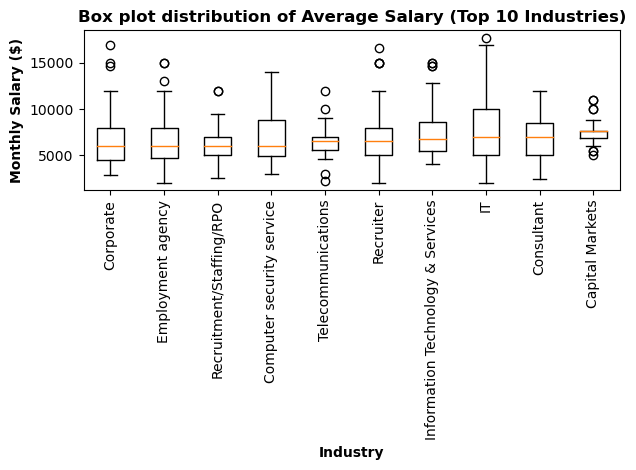

In [264]:
labels, data = [*zip(*industry_salary_dict.items())]
plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.xticks(rotation=90)
plt.xlabel('Industry', fontweight ='bold')
plt.ylabel('Monthly Salary ($)', fontweight ='bold') 
plt.title('Box plot distribution of Average Salary (Top 10 Industries)', fontweight ='bold')
plt.tight_layout()

plt.savefig("./plots/Box plot distribution of Average Salary (Top 10 Industries).png", dpi=1000, bbox_inches = "tight")
plt.show()


### Plot horizontal graph

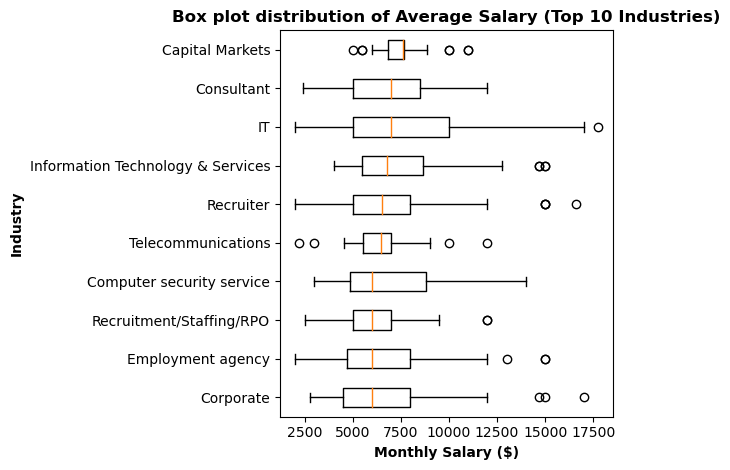

In [265]:
labels, data = [*zip(*industry_salary_dict.items())]
plt.boxplot(data, vert=False)
plt.yticks(range(1, len(labels) + 1), labels)
plt.yticks(rotation=0)
plt.ylabel('Industry', fontweight ='bold')
plt.xlabel('Monthly Salary ($)', fontweight ='bold') 
plt.title('Box plot distribution of Average Salary (Top 10 Industries)', fontweight ='bold')
plt.tight_layout()

plt.savefig("./plots/Box plot distribution of Average Salary (Top 10 Industries).png", dpi=1000, bbox_inches = "tight")
plt.show()


## Average Salary distribution by service provider

### Prepare dictionary for plotting

In [266]:
# Initialise dict 
provider_list = ["aws", "google_cloud", "azure"]
provider_salary_dict = {key: [] for key in provider_list}
provider_salary_dict

{'aws': [], 'google_cloud': [], 'azure': []}

In [267]:
# Loop through salary_df and append salary to provider_salary_dict by industry
for i in range(len(salary_df)):
    salary = salary_df["average_salary"].iloc[i]
    # Convert yearly salary to monthly salary
    if salary > 17750:
        salary = int(salary / 12)

    for provider in provider_list:
        if salary_df[provider].iloc[i] == 1:
            provider_salary_dict[provider].append(salary)

In [268]:
# Create dictionary with medians
labels, data = [*zip(*provider_salary_dict.items())]

median_dict = {}
for i in range(len(data)):
    median_dict[labels[i]] = statistics.median(data[i])

# Sort by median_dict by median
median_dict = Counter(median_dict)
median_dict = {k: v for k, v in sorted(median_dict.items(), key=lambda item: item[1], reverse=False)}
print(median_dict)

# Get key list ordered
provider_order = list(median_dict.keys())

# Reorder provider_salary_dict by provider_order
for key in provider_order:
    provider_salary_dict[key] = provider_salary_dict.pop(key)

{'aws': 8000.0, 'azure': 8000.0, 'google_cloud': 9000}


### Plot graph

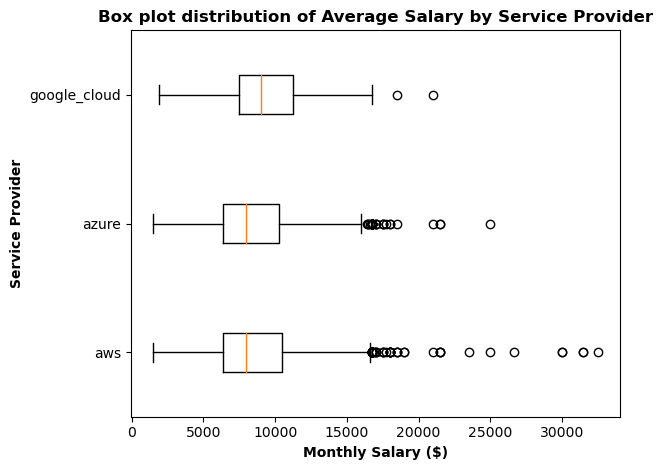

In [269]:
labels, data = [*zip(*provider_salary_dict.items())]
plt.boxplot(data, vert=False)
plt.yticks(range(1, len(labels) + 1), labels)
# plt.yticks(rotation=90)
plt.ylabel('Service Provider', fontweight ='bold')
plt.xlabel('Monthly Salary ($)', fontweight ='bold') 
plt.title('Box plot distribution of Average Salary by Service Provider', fontweight ='bold')
plt.tight_layout()

plt.savefig("./plots/Box plot distribution of Average Salary by Service Provider.png", dpi=1000, bbox_inches = "tight")
plt.show()


## Average Salary distribution by job role

### Get top 10 roles by listing count

In [348]:
# Get top 10 job roles by count
value_dict = df["cluster"].value_counts().to_dict()
keep_roles = list(value_dict.keys())[:10]
print(keep_roles)

# Filter salary_df to contain only top 10 roles
role_salary_df = salary_df.loc[df['cluster'].isin(keep_roles)]

['Solutions Architect', 'Software Engineer', 'Software Developer', 'Data Engineer', 'Cloud Engineer', 'Devops Engineer', 'Security Engineer', 'Specialist', 'Full Stack Developer/Engineer', 'Network Engineer']


### Prepare dictionary for plotting

In [349]:
# Initialise dict 
role_salary_dict = {key: [] for key in keep_roles}

# Loop through role_salary_df and append salary to role_salary_dict by role
for i in range(len(role_salary_df)):
    salary = role_salary_df["average_salary"].iloc[i]
    # Convert yearly salary to monthly salary
    if salary > 17750:
        salary = int(salary / 12)
    role_salary_dict[role_salary_df["cluster"].iloc[i]].append(salary)

In [350]:
# Create dictionary with medians
labels, data = [*zip(*role_salary_dict.items())]

median_dict = {}
for i in range(len(data)):
    median_dict[labels[i]] = statistics.median(data[i])

# Sort by median_dict by median
median_dict = Counter(median_dict)
median_dict = {k: v for k, v in sorted(median_dict.items(), key=lambda item: item[1], reverse=False)}
print(median_dict)

# Get key list ordered
role_order = list(median_dict.keys())

# Reorder role_salary_dict by role_order
for key in role_order:
    role_salary_dict[key] = role_salary_dict.pop(key)

{'Software Developer': 7000.0, 'Specialist': 7000.0, 'Network Engineer': 7150, 'Software Engineer': 7500.0, 'Cloud Engineer': 8000, 'Devops Engineer': 8000.0, 'Security Engineer': 8000.0, 'Full Stack Developer/Engineer': 8082.0, 'Data Engineer': 9000.0, 'Solutions Architect': 10062.0}


### Plot Graph

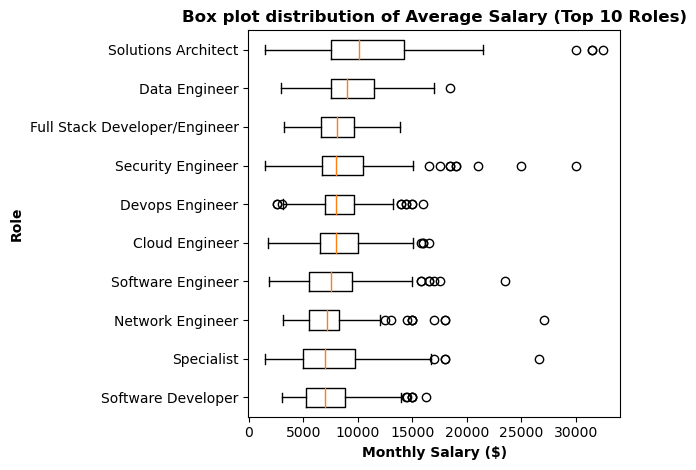

In [351]:
labels, data = [*zip(*role_salary_dict.items())]
plt.boxplot(data, vert=False)
plt.yticks(range(1, len(labels) + 1), labels)
# plt.xticks(rotation=90)
plt.ylabel('Role', fontweight ='bold')
plt.xlabel('Monthly Salary ($)', fontweight ='bold') 
plt.title('Box plot distribution of Average Salary (Top 10 Roles)', fontweight ='bold')
plt.tight_layout()

plt.savefig("./plots/Box plot distribution of Average Salary (Top 10 Roles).png", dpi=1000, bbox_inches = "tight")
plt.show()


## Average Salary distribution by Education level requirements

### Clean Education rows

In [274]:
education_salary_df = salary_df[df["education_field"].astype(bool)]

<ipython-input-274-80f7b9b3982e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  education_salary_df = salary_df[df["education_field"].astype(bool)]


In [275]:
# Keep only top education level
for i in range(len(education_salary_df)):
    education_list = education_salary_df["education_level"].iloc[i]
    if "PhD" in education_list:
        education_salary_df["education_level"].iloc[i] = "PhD"
    elif "Master's" in education_list:
        education_salary_df["education_level"].iloc[i] = "Master's"
    elif "Bachelor's" in education_list:
        education_salary_df["education_level"].iloc[i] = "Bachelor's"
    elif "Diploma" in education_list:
        education_salary_df["education_level"].iloc[i] = "Diploma"

/Users/joshuawong/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Prepare dictionary for plotting

In [276]:
value_dict = education_salary_df["education_level"].value_counts().to_dict()
education_levels = list(value_dict.keys())
print(education_levels)

["Bachelor's", "Master's", 'Diploma', 'PhD']


In [277]:
# Initialise dict 
education_salary_dict = {key: [] for key in education_levels}

# Loop through education_salary_df and append salary to education_salary_dict by role
for i in range(len(education_salary_df)):
    salary = education_salary_df["average_salary"].iloc[i]
    # Convert yearly salary to monthly salary
    if salary > 17750:
        salary = int(salary / 12)
    education_salary_dict[education_salary_df["education_level"].iloc[i]].append(salary)

In [278]:
education_order = ['Diploma', "Bachelor's", "Master's", 'PhD']

# Reorder dictionary
for key in education_order:
    education_salary_dict[key] = education_salary_dict.pop(key)

### Plot Graph

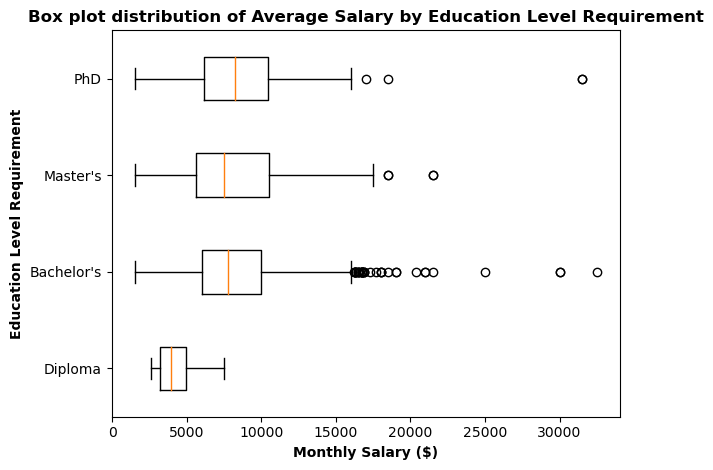

In [279]:
labels, data = [*zip(*education_salary_dict.items())]
plt.boxplot(data, vert=False)
plt.yticks(range(1, len(labels) + 1), labels)
# plt.xticks(rotation=90)
plt.ylabel('Education Level Requirement', fontweight ='bold')
plt.xlabel('Monthly Salary ($)', fontweight ='bold') 
plt.title('Box plot distribution of Average Salary by Education Level Requirement', fontweight ='bold')
plt.tight_layout()

plt.savefig("./plots/Box plot distribution of Average Salary by Education Level Requirement.png", dpi=1000, bbox_inches = "tight")
plt.show()

## Average salary distribution by company (top 10) - (version 1, top number of postings with salary listings)

### Get all companies by listing count

In [372]:
# Get all unique companies 
value_dict = df["company_name"].value_counts().to_dict()
keep_companies = list(value_dict.keys())
# print(keep_companies)

# Filter salary_df to contain all companies
company_salary_df = salary_df.loc[salary_df['company_name'].isin(keep_companies)]

### Prepare dictionary for plotting

In [373]:
# Initialise dict 
company_salary_dict = {key: [] for key in keep_companies}

# Loop through company_salary_df and append salary to company_salary_dict by company
for i in range(len(company_salary_df)):
    salary = company_salary_df["average_salary"].iloc[i]
    # Convert yearly salary to monthly salary
    if salary > 17750:
        salary = int(salary / 12)
    company_salary_dict[company_salary_df["company_name"].iloc[i]].append(salary)

In [375]:
# get dictionary of companies based on number of salaries listed in postings
company_salary_dict_counts = dict(company_salary_dict)

for company, list_of_salaries in company_salary_dict_counts.items():
    company_salary_dict_counts[company] = len(list_of_salaries)

# Sort company_salary_dict_counts 
company_salary_dict_counts = {k: v for k, v in sorted(company_salary_dict_counts.items(), key=lambda item: item[1], reverse=True)}
company_salary_dict_counts

{'jpmorgan chase & co.': 76,
 'the supreme hr advisory pte. ltd.': 51,
 'luxoft': 46,
 'amazon web services (aws)': 44,
 'tiktok pte. ltd.': 42,
 'singtel': 36,
 'adecco personnel pte ltd': 36,
 'flintex consulting pte. ltd.': 36,
 'persolkelly singapore pte. ltd.': 26,
 'randstad': 24,
 'hyperscal solutions pte. ltd.': 23,
 'microsoft': 21,
 'recruit express pte ltd': 21,
 'amazon web services singapore private limited': 21,
 'randstad pte. limited': 19,
 'govtech': 18,
 'unisoft infotech pte ltd': 17,
 'capgemini singapore pte. ltd.': 17,
 'hcl singapore pte. ltd.': 17,
 'accenture': 16,
 'nsearch global pte. ltd.': 16,
 'itcan pte. limited': 16,
 'morgan mckinley pte. ltd.': 16,
 'decision science agency pte. ltd.': 16,
 'ntt data singapore pte. ltd.': 16,
 'manpower staffing services (singapore) pte ltd': 16,
 'recruit expert pte. ltd.': 15,
 'singapore telecommunications limited': 14,
 'aspire nxt pte. ltd.': 14,
 'ensign infosecurity (cybersecurity) pte. ltd.': 14,
 'accenture pt

In [378]:
# Keep only top 20
company_salary_dict2 = dict({ your_key: company_salary_dict[your_key] for your_key in list(company_salary_dict_counts.keys())[:20] })
labels, data = [*zip(*company_salary_dict2.items())]

median_dict = {}
for i in range(len(data)):
    try:
        median_dict[labels[i]] = statistics.median(data[i])
    except:
        median_dict[labels[i]] = 0

# Sort by median_dict by median
median_dict = Counter(median_dict)
median_dict = {k: v for k, v in sorted(median_dict.items(), key=lambda item: item[1], reverse=False)}
print(median_dict)

# Get key list ordered
company_order = list(median_dict.keys())

# Reorder company_salary_dict_counts by company_order
for key in company_order:
    company_salary_dict2[key] = company_salary_dict2.pop(key)

{'amazon web services (aws)': 1500.0, 'the supreme hr advisory pte. ltd.': 3700, 'hyperscal solutions pte. ltd.': 5750, 'flintex consulting pte. ltd.': 7250.0, 'persolkelly singapore pte. ltd.': 7500.0, 'recruit express pte ltd': 7500, 'randstad': 7750.0, 'randstad pte. limited': 7750, 'accenture': 7885.0, 'govtech': 8000.0, 'adecco personnel pte ltd': 8550.0, 'singtel': 8847.5, 'unisoft infotech pte ltd': 9000, 'luxoft': 9614.0, 'jpmorgan chase & co.': 11133.0, 'hcl singapore pte. ltd.': 11750, 'capgemini singapore pte. ltd.': 13500, 'tiktok pte. ltd.': 15000.0, 'microsoft': 16750, 'amazon web services singapore private limited': 18500}


### Plot Graph

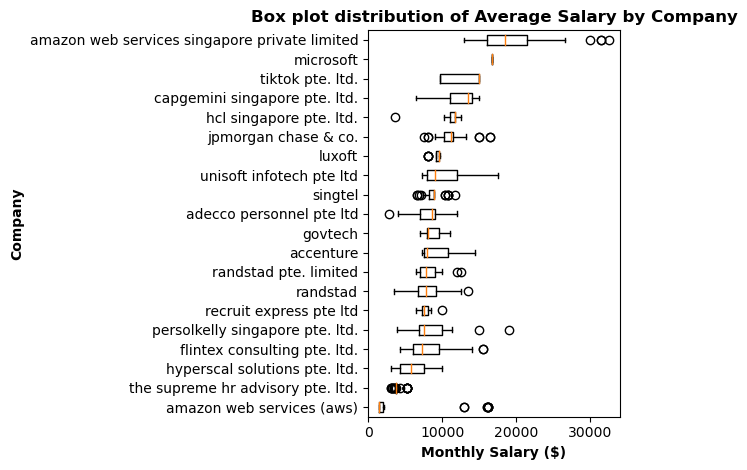

In [380]:
labels, data = [*zip(*company_salary_dict2.items())]
plt.boxplot(data, vert=False)
plt.yticks(range(1, len(labels) + 1), labels)
# plt.xticks(rotation=90)
plt.ylabel('Company', fontweight ='bold')
plt.xlabel('Monthly Salary ($)', fontweight ='bold') 
plt.title('Box plot distribution of Average Salary by Company', fontweight ='bold')
plt.tight_layout()

plt.savefig("./plots/Box plot distribution of Average Salary by Company.png", dpi=1000, bbox_inches = "tight")
plt.show()

## Average salary distribution by company (top 20) - (version 2, top number of postings)

### Get top 20 companies by listing count

In [369]:
# Get all unique companies 
value_dict = df["company_name"].value_counts().to_dict()
keep_companies = list(value_dict.keys())[:20]
print(keep_companies)

# Filter salary_df to contain all companies
company_salary_df = salary_df.loc[salary_df['company_name'].isin(keep_companies)]

['amazon', 'singtel', 'amazon web services (aws)', 'e27 media platform', 'govtech', 'jpmorgan chase & co.', 'luxoft', 'accenture pte ltd', 'the supreme hr advisory pte. ltd.', 'vmware', 'microsoft', 'byte dance', 'ibm', 'tiktok pte. ltd.', 'adecco personnel pte ltd', 'st engineering', 'flintex consulting pte. ltd.', 'tiktok ', 'autodesk', 'bytedance']


### Prepare Dictionary for plotting

In [370]:
# Initialise dict 
company_salary_dict = {key: [] for key in keep_companies}

# Loop through company_salary_df and append salary to company_salary_dict by company
for i in range(len(company_salary_df)):
    salary = company_salary_df["average_salary"].iloc[i]
    # Convert yearly salary to monthly salary
    if salary > 17750:
        salary = int(salary / 12)
    company_salary_dict[company_salary_df["company_name"].iloc[i]].append(salary)

In [371]:
# Create dictionary with medians
labels, data = [*zip(*company_salary_dict.items())]

median_dict = {}
for i in range(len(data)):
    median_dict[labels[i]] = statistics.median(data[i])

# Sort by median_dict by median
median_dict = Counter(median_dict)
median_dict = {k: v for k, v in sorted(median_dict.items(), key=lambda item: item[1], reverse=False)}
print(median_dict)

# Get key list ordered
role_order = list(median_dict.keys())

# Reorder company_salary_dict by role_order
for key in role_order:
    company_salary_dict[key] = company_salary_dict.pop(key)

StatisticsError: no median for empty data

### Plot Graph

In [ ]:
labels, data = [*zip(*company_salary_dict2.items())]
plt.boxplot(data, vert=False)
plt.yticks(range(1, len(labels) + 1), labels)
# plt.xticks(rotation=90)
plt.ylabel('Company', fontweight ='bold')
plt.xlabel('Monthly Salary ($)', fontweight ='bold') 
plt.title('Box plot distribution of Average Salary by Company', fontweight ='bold')
plt.tight_layout()

plt.savefig("./plots/Box plot distribution of Average Salary by Company.png", dpi=1000, bbox_inches = "tight")
plt.show()

# 6. Wordclouds

In [280]:
def join_text():
    pass

def generate_wordcloud():
    pass


In [281]:
# text_joined = " ".join(row for row in df['text'])

In [282]:
# # Create and generate a word cloud image:
# wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=1500, height=800).generate(text_joined)

# # Display the generated image:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()